# IDEA
### People are more likely to ride bike for a shorter distance that takes less than 10 minutes.
# Significance threshold
### Significance level  α=0.05, which means I want the probability of getting a result at least as significant as mine to be less then 5%.
# Null hypothesis
### The proportion of trips whose duration is less than 10 minutes is the same or lower than the proportion of trips whose duration is more than 10 minutes
### H0: ${Tripduration_{\mathrm{short}}} <= {Tripduration_{\mathrm{long}}}$

# Alternate hypothesis
### The proportion of trips whose duration is less than 10 minutes is higher than the proportion of trips whose duration is more than 10 minutes
### H0: ${Tripduration_{\mathrm{short}}} > {Tripduration_{\mathrm{long}}}$

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
%pylab inline
os.getenv ('PUIDATA')

Populating the interactive namespace from numpy and matplotlib


'/nfshome/jc9033/PUIdata'

In [2]:
# Revise the function to support the datasets after 201612

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.csv.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.csv.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.csv.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring = '201801'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df['date'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,2018-01-01 13:50:57.434
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,2018-01-01 15:33:30.182
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1,2018-01-01 15:39:18.337
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72,W 52 St & 11 Ave,40.767272,-73.993929,447,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1,2018-01-01 15:40:13.372
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72,W 52 St & 11 Ave,40.767272,-73.993929,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1,2018-01-01 18:14:51.568


In [5]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [6]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'], axis=1, inplace=True)

In [7]:
df.head()

,tripduration,date
0,970,2018-01-01 13:50:57.434
1,723,2018-01-01 15:33:30.182
2,496,2018-01-01 15:39:18.337
3,306,2018-01-01 15:40:13.372
4,306,2018-01-01 18:14:51.568


### Lets separate short duration (_s) from long duration (_l) to test the hypotheses.
### In this csv file duration >= 600 is long, duration < 600 is short
### Lets plot the number of trips per week day

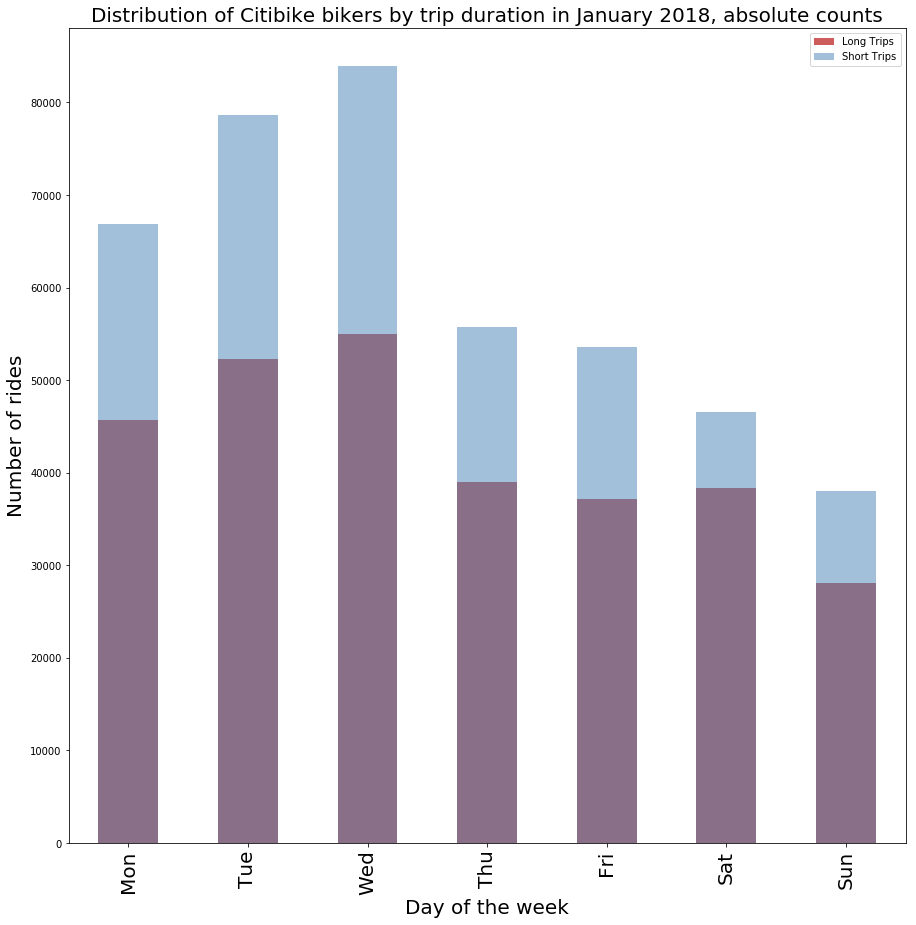

In [8]:
fig = pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_l = 1
((df['date'][df['tripduration'] >= 600].groupby([df['date'].dt.weekday]).count()) / norm_l).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='Long Trips')

norm_s = 1
ax = ((df['date'][df['tripduration'] < 600].groupby([df['date'].dt.weekday]).count()) / norm_s).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='Short Trips')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.title('Distribution of Citibike bikers by trip duration in January 2018, absolute counts', fontsize = 20)
pl.xlabel('Day of the week', fontsize = 20)
pl.ylabel('Number of rides', fontsize = 20)
pl.legend()

## Figure 1a: Distribution of Citibike bikers by trip duration in January 2018, absolute counts

### Note: the counts have errors of course. what is the error on the count statistics? 
### for N counts the error is sqrt(N) - this is because counts follow a Poisson statistic

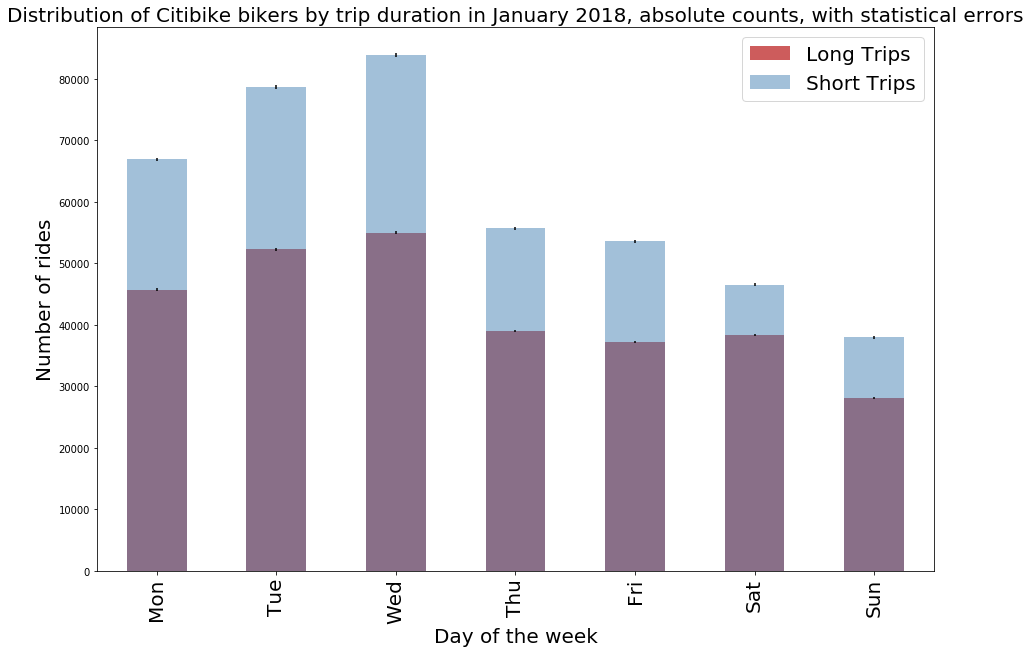

In [9]:
fig=pl.figure(figsize(15,10))

counts_l = df.date[df.tripduration >= 600].groupby([df.date.dt.weekday]).count()
norm_l = 1
error_l = np.sqrt(counts_l)
ax=((counts_l) / norm_l).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_l) / norm_l, (error_l) / norm_l)], label='Long Trips')


counts_s = df.date[df.tripduration < 600].groupby([df.date.dt.weekday]).count()
norm_s = 1
error_s =np.sqrt(counts_s)
((counts_s) / norm_s).plot(kind="bar", alpha=0.5, yerr=[((error_s) / norm_s, (error_s) / norm_s)], 
                           color='SteelBlue', label='Short Trips')

ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)

pl.title('Distribution of Citibike bikers by trip duration in January 2018, absolute counts, with statistical errors', fontsize = 20)
pl.xlabel('Day of the week', fontsize = 20)
pl.ylabel('Number of rides', fontsize = 20)
pl.legend(['Long Trips','Short Trips'],fontsize=20)


## Figure 1b: Distribution of Citibike bikers by trip duration in January 2018, absolute counts, with statistical errors

Note: These are absolute numbers. It is very hard to compare absolute numbers. Ratios (or proportions) are more ameable to comparison, so let's _normalize_ the distribution of man, and that of women, i.e. devide them by the total number of rides for that gender. 
(Notice that i have to normalize the errorbars too!)



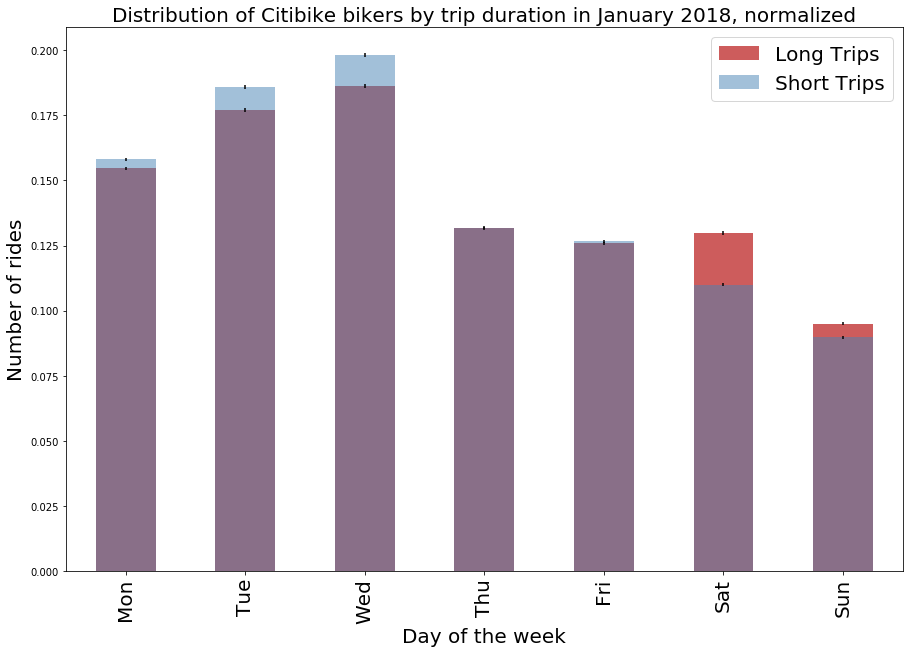

In [10]:
fig = pl.figure(figsize(15,10))

norm_l = counts_l.sum()
error_l = np.sqrt(counts_l)
((counts_l) / norm_l).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_l) / norm_l, (error_l) / norm_l)], 
                           label='Long Trips')

norm_s = counts_s.sum()
ax = ((counts_s) / norm_s).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_s) / norm_s, (error_s) / norm_s)], 
                                color='SteelBlue', label='Short Trips')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day of the week")
pl.title('Distribution of Citibike bikers by trip duration in January 2018, normalized', fontsize = 20)
pl.xlabel('Day of the week', fontsize = 20)
pl.ylabel('Number of rides', fontsize = 20)
pl.legend(['Long Trips','Short Trips'],fontsize=20)

## Figure 2: Distribution of Citibike bikers by trip duration in January 2018, normalized

we can add up the weekend days and normalize by the totals, then this becomes a test of proportions, (like the one seen in the [employment notebook](https://github.com/fedhere/UInotebooks/blob/master/hypothesistesting/effectivenes%20of%20NYC%20Post-Prison%20Employment%20Programs.save.ipynb))